In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring Data

In [3]:
df=pd.read_csv('googleplaystore_updated.csv')
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Released,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",0,Everyone,Art & Design,"Aughust 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.tail()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Released,Current Ver,Android Ver
10836,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
df.shape

(10841, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10841 non-null  int64  
 1   App             10841 non-null  object 
 2   Category        10841 non-null  object 
 3   Rating          9367 non-null   float64
 4   Reviews         10841 non-null  object 
 5   Size            10841 non-null  object 
 6   Installs        10841 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Released        10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Price                0
Content Rating       1
Genres               0
Released             0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
df.nunique()

Unnamed: 0        10841
App                9660
Category             34
Rating               40
Reviews            6002
Size                462
Installs             22
Price                93
Content Rating        6
Genres              120
Released           1378
Current Ver        2832
Android Ver          33
dtype: int64

**As Show There is 10841 App Number but there is only 9660 App doesn't repeated**

> So we need to check if we found duplicated rows

In [9]:
df.duplicated().sum()

np.int64(0)

# Let's Start Cleaning

**First: Handle First Column Name**

In [10]:
df.rename(columns={'Unnamed: 0':'App Number'},inplace=True)
df.head()

,App Number,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Released,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",0,Everyone,Art & Design,"Aughust 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Second: Show Duplicated Apps to explore what different between these rows**

In [11]:
df[df.duplicated(subset=['App'], keep=False)]

,App Number,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Released,Current Ver,Android Ver
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
23,23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
36,36,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,8145,24M,"500,000+",0,Everyone,Art & Design;Creativity,"Aughust 2, 2018",1.0.9,4.4 and up
42,42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
139,139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,Varies with device,"100,000,000+",0,Teen,Books & Reference,"Aughust 1, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


**Try to explore what different**

In [12]:
df[df['App']=='Coloring book moana']

,App Number,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Released,Current Ver,Android Ver
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2033,2033,Coloring book moana,FAMILY,3.9,974,14M,"500,000+",0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [13]:
df[df['App']=='Mcqueen Coloring pages']

,App Number,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Released,Current Ver,Android Ver
23,23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
2111,2111,Mcqueen Coloring pages,FAMILY,NaN,65,7.0M,"100,000+",0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up


In [14]:
df[df['App']=='FarmersOnly Dating']

,App Number,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Released,Current Ver,Android Ver
514,514,FarmersOnly Dating,DATING,3.0,1146,1.4M,"100,000+",0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10715,10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up


> From that I explain that the different found in 'Category' & 'Reviews' Columns
* **Try to Handle 'Category' Column By combining categories together**
  > * Combine these with '_AND_' like other rows
  > * Make sure Combining is done

In [15]:
df['Category'] = df.groupby('App')['Category'].transform(lambda x: '_AND_'.join(set(x)))
df[df.duplicated(subset=['App'], keep=False)]

,App Number,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Released,Current Ver,Android Ver
1,1,Coloring book moana,ART_AND_DESIGN_AND_FAMILY,3.9,967,14M,"500,000+",0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
23,23,Mcqueen Coloring pages,ART_AND_DESIGN_AND_FAMILY,NaN,61,7.0M,"100,000+",0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
36,36,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN_AND_FAMILY,4.7,8145,24M,"500,000+",0,Everyone,Art & Design;Creativity,"Aughust 2, 2018",1.0.9,4.4 and up
42,42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
139,139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,Varies with device,"100,000,000+",0,Teen,Books & Reference,"Aughust 1, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


**We should take into considration that we should take greater Review**
> To sort rows by 'Review' Column we should first handle this column to convert this to int Column not object

In [16]:
df['Reviews']=df['Reviews'].apply(lambda x:
                                  float(x.replace('K',''))*1000 if 'K' in str(x) else
                                  float(x.replace('M',''))*1000000 if 'M' in str(x) else
                                  float(x)).astype(int)
df.dtypes

App Number          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Price              object
Content Rating     object
Genres             object
Released           object
Current Ver        object
Android Ver        object
dtype: object

> * Then sort rows by 'Review' Column descending to get greater value
> * then we should delete duplicated Apps with smaller Review value
> * Then check Duplicates

In [17]:
df=df.sort_values(by='Reviews',ascending=False)
df.drop_duplicates(subset=['App'],keep='first',inplace=True)
df.duplicated(subset=['App'], keep=False).sum()

np.int64(0)

**Resort Value By index and change index to equal New Apps Number**

In [18]:
df=df.sort_values(by='App Number').reset_index(drop=True)
df['App Number']=range(len(df))
df.head()

,App Number,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Released,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",0,Everyone,Art & Design,"Aughust 1, 2018",1.2.4,4.0.3 and up
2,2,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
3,3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
4,4,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


**Check unique values**

In [19]:
df.nunique()

App Number        9660
App               9660
Category            44
Rating              40
Reviews           5335
Size               462
Installs            22
Price               93
Content Rating       6
Genres             119
Released          1378
Current Ver       2820
Android Ver         33
dtype: int64

**Show null values**

In [20]:
df.isnull().sum()

App Number           0
App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Price                0
Content Rating       1
Genres               0
Released             0
Current Ver          8
Android Ver          3
dtype: int64

**Rating contains float values so I think that right to fill null with mean value**

In [21]:
df['Rating']=df['Rating'].fillna(df['Rating'].mean())
df.isnull().sum()

App Number        0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Price             0
Content Rating    1
Genres            0
Released          0
Current Ver       8
Android Ver       3
dtype: int64

**'Content Rating' contains str values so I'll fill this with 'Unknown' value**

In [22]:
df['Content Rating']=df['Content Rating'].fillna('UnKnown')
df.isnull().sum()

App Number        0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Price             0
Content Rating    0
Genres            0
Released          0
Current Ver       8
Android Ver       3
dtype: int64

# Let's Handle Columns and these data types

In [23]:
df['Released'].unique()

array(['January 7, 2018', 'Aughust 1, 2018', 'June 8, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      shape=(1378,), dtype=object)

**I discovered some values that contain the names of months written incorrectly**
> first handle these months and change data type to datetime

In [24]:
months_mapping = {
    'Jan': 'January', 'Feb': 'February', 'Mar': 'March',
    'Apr': 'April', 'May': 'May', 'Jun': 'June',
    'Jul': 'July', 'Aug': 'August', 'Sep': 'September',
    'Oct': 'October', 'Nov': 'November', 'Dec': 'December'
}

def right_date(date):
    parts = date.split()
    if len(parts) == 3:  
        for wrong,right in months_mapping.items():
            if parts[0].startswith(wrong):    
                return f"{months_mapping[wrong]} {parts[1]}, {parts[2]}"
    return date  

df['Released'] = pd.to_datetime(df['Released'].apply(right_date),errors='coerce')
df.dtypes

App Number                 int64
App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                      object
Installs                  object
Price                     object
Content Rating            object
Genres                    object
Released          datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

**Check Values that may error with conversion and become null**

In [25]:
df.isnull().sum()

App Number        0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Price             0
Content Rating    0
Genres            0
Released          1
Current Ver       8
Android Ver       3
dtype: int64

In [26]:
df[df['Released'].isna()] 

,App Number,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Released,Current Ver,Android Ver
9294,9294,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000,"1,000+",Free,Everyone,UnKnown,"February 11, 2018",NaT,4.0 and up,NaN


**We found row with fake data that make be shifted**
> shift the date that found in Genres to Released value

In [27]:
df['Released']=df['Released'].fillna('February 11, 2018')
df.isnull().sum()

App Number        0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Price             0
Content Rating    0
Genres            0
Released          0
Current Ver       8
Android Ver       3
dtype: int64

# Let's Handle data Column by Column

**First Check Unique Values in 'Category' Column**

In [28]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'BUSINESS_AND_COMMUNICATION',
       'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION',
       'FAMILY_AND_EDUCATION', 'ENTERTAINMENT',
       'FAMILY_AND_ENTERTAINMENT', 'EVENTS', 'FINANCE', 'FOOD_AND_DRINK',
       'HEALTH_AND_FITNESS', 'HEALTH_AND_FITNESS_AND_MEDICAL',
       'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE',
       'FAMILY_AND_GAME', 'GAME', 'SPORTS_AND_GAME', 'FAMILY',
       'ART_AND_DESIGN_AND_FAMILY', 'MEDICAL', 'SOCIAL', 'SHOPPING',
       'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL', 'TOOLS',
       'TOOLS_AND_DATING', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING',
       'WEATHER', 'VIDEO_PLAYERS', 'FAMILY_AND_VIDEO_PLAYERS',
       'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       'TOOLS_AND_HOUSE_AND_HOME', '1.9'], dtype=object)

**Found integar value between str values check the number of that value**

In [29]:
(df['Category']=='1.9').sum()

np.int64(1)

In [30]:
df[df['Category']=='1.9']

,App Number,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Released,Current Ver,Android Ver
9294,9294,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000,"1,000+",Free,Everyone,UnKnown,"February 11, 2018",2018-02-11,4.0 and up,NaN


**We weren't able to expect that value what shoud be because Genres also don't have right value**
> Update this value by 'UnKnown' value

In [31]:
df['Category']=df['Category'].replace({'1.9':'UnKnown'})
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'BUSINESS_AND_COMMUNICATION',
       'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION',
       'FAMILY_AND_EDUCATION', 'ENTERTAINMENT',
       'FAMILY_AND_ENTERTAINMENT', 'EVENTS', 'FINANCE', 'FOOD_AND_DRINK',
       'HEALTH_AND_FITNESS', 'HEALTH_AND_FITNESS_AND_MEDICAL',
       'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE',
       'FAMILY_AND_GAME', 'GAME', 'SPORTS_AND_GAME', 'FAMILY',
       'ART_AND_DESIGN_AND_FAMILY', 'MEDICAL', 'SOCIAL', 'SHOPPING',
       'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL', 'TOOLS',
       'TOOLS_AND_DATING', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING',
       'WEATHER', 'VIDEO_PLAYERS', 'FAMILY_AND_VIDEO_PLAYERS',
       'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       'TOOLS_AND_HOUSE_AND_HOME', 'UnKnown'], dtype=object)

**'Rating' Column must contain values between [0:5]**
> Check Range Value in 'Rating' Column

In [32]:
print(df['Rating'].min())
print(df['Rating'].max())

1.0
19.0


**We found that maximum value=19.0 not 5.0**
> **we need to know How many values equal greater than 5.0**

In [33]:
(df['Rating']>5.0).sum()

np.int64(1)

**we should replace that by mean value to save mean value right**
> then check max value

In [34]:
df['Rating']=df['Rating'].replace({19.0:df['Rating'].mean()})
df['Rating'].max()

np.float64(5.0)

**'Rating' Column has float data type so we don't need to convert it**

**let's check 'Size' column values**

In [35]:
df['Size'].unique()

array(['19M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M', '28M',
       '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M', '31M',
       '14M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '24M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '41M', '48M', '46M', '51M', '8.5M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '8.4M', '118k', '44M', '695k', '1.6M', '18k',
     

**We found 1000+ value that doesn't match column values**

In [36]:
(df['Size']=='1,000+').sum()

np.int64(1)

In [37]:
df[df['Size']=='1,000+']

,App Number,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Released,Current Ver,Android Ver
9294,9294,Life Made WI-Fi Touchscreen Photo Frame,UnKnown,4.175076,3000000,"1,000+",Free,Everyone,UnKnown,"February 11, 2018",2018-02-11,4.0 and up,NaN


**We couldn't expect this right value from row so we will fill that by 0**

In [38]:
df['Size']= df['Size'].replace({'1,000+': 0})
df['Size'].unique()

array(['19M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M', '28M',
       '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M', '31M',
       '14M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '24M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '41M', '48M', '46M', '51M', '8.5M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '8.4M', '118k', '44M', '695k', '1.6M', '18k',
     

**We found 'Veries with device' value that considered isn't know**

In [39]:
(df['Size']=='Varies with device').value_counts()

Size
False    8432
True     1228
Name: count, dtype: int64

* **Replace it by 0 and from first unique check we show that this column doesn't contain 0 values so when used this later must don't take this value into considration**
* **Convert the data type of that column to be float**
  > convert all values in that Column to be in MB

In [40]:
df['Size']=df['Size'].replace({'Varies with device': 0})
df['Size']=df['Size'].apply(lambda x:
                            float(x.replace('M','')) if 'M' in str(x) else
                            float(x.replace('K',''))/1024 if 'K' in str(x) else
                            float(x.replace('k',''))/1024 if 'k' in str(x) else
                            float(x))
df.rename(columns={'Size':'Size in (MB)'},inplace=True)
df.head()

,App Number,App,Category,Rating,Reviews,Size in (MB),Installs,Price,Content Rating,Genres,Released,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
2,2,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
3,3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
4,4,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,"50,000+",0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up


In [41]:
df.dtypes

App Number                 int64
App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size in (MB)             float64
Installs                  object
Price                     object
Content Rating            object
Genres                    object
Released          datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

In [42]:
df.isnull().sum()

App Number        0
App               0
Category          0
Rating            0
Reviews           0
Size in (MB)      0
Installs          0
Price             0
Content Rating    0
Genres            0
Released          0
Current Ver       8
Android Ver       3
dtype: int64

**Let's check 'Installs' Column values**

In [43]:
df['Installs'].unique()

array(['10,000+', '5,000,000+', '50,000,000+', '100,000+', '50,000+',
       '1,000,000+', '10,000,000+', '5,000+', '500,000+',
       '1,000,000,000+', '100,000,000+', '1,000+', '500,000,000+', '50+',
       '100+', '500+', '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

**We found 'Free' value let's check How many rows cotain that**

In [44]:
df[df['Installs']=='Free']

,App Number,App,Category,Rating,Reviews,Size in (MB),Installs,Price,Content Rating,Genres,Released,Current Ver,Android Ver
9294,9294,Life Made WI-Fi Touchscreen Photo Frame,UnKnown,4.175076,3000000,0.0,Free,Everyone,UnKnown,"February 11, 2018",2018-02-11,4.0 and up,NaN


* **We couldn't expect this value so I'll replace that by 0**
* **Let's change + and , signs to convert column to integar data type**
* **By change them the column will contains min values to we should change its name**

In [45]:
df['Installs']=df['Installs'].replace({'Free':0})
df['Installs']=df['Installs'].apply(lambda x:
                                   int(x.replace('+','').replace(',','')) if '+' in str(x)
                                   else int(x))
df.rename(columns={'Installs':'Min Installs'},inplace=True)
df.head()

,App Number,App,Category,Rating,Reviews,Size in (MB),Min Installs,Price,Content Rating,Genres,Released,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
2,2,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
3,3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
4,4,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up


In [46]:
df.dtypes

App Number                 int64
App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size in (MB)             float64
Min Installs               int64
Price                     object
Content Rating            object
Genres                    object
Released          datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

**Check 'Price' column values**

In [47]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$1.49', '$2.99', '$7.99', '$3.49', '$1.99',
       '$5.99', '$6.99', '$9.99', '$7.49', '$0.99', '$11.99', '$79.99',
       '$14.99', '$1.00', '$2.49', '$24.99', '$10.99', '$1.50', '$19.99',
       '$29.99', '$15.99', '$9.00', '$10.00', '$16.99', '$74.99', '$5.49',
       '$33.99', '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$2.00',
       '$3.88', '$25.99', '$399.99', '$17.99', '$400.00', '$3.02',
       '$1.76', '$4.84', '$4.77', '$1.61', '$2.50', '$1.59', '$6.49',
       '$1.29', '$5.00', '$13.99', '$299.99', '$379.99', '$37.99',
       '$18.99', '$389.99', '$19.90', '$8.49', '$1.75', '$14.00', '$4.85',
       '$46.99', '$109.99', '$154.99', '$3.08', '$2.59', '$4.80', '$1.96',
       '$19.40', '$3.90', '$4.59', '$15.46', '$3.04', '$12.99', '$4.29',
       '$2.60', '$3.28', '$4.60', '$28.99', '$2.95', '$2.90', '$1.97',
       '$200.00', '$89.99', '$2.56', '$30.99', '$3.61', '$394.99',
       '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [48]:
df[df['Price']=='Everyone']

,App Number,App,Category,Rating,Reviews,Size in (MB),Min Installs,Price,Content Rating,Genres,Released,Current Ver,Android Ver
9294,9294,Life Made WI-Fi Touchscreen Photo Frame,UnKnown,4.175076,3000000,0.0,0,Everyone,UnKnown,"February 11, 2018",2018-02-11,4.0 and up,NaN


* **This row was contain 'Free' value so we can replace that value by 0**
* **drop $ sign to convert that row to float**

* **Change its name to know that in $**

In [49]:
df['Price']=df['Price'].replace({'Everyone':0})
df['Price']=df['Price'].apply(lambda x:
                             float(x.replace('$','')) if '$' in str(x) 
                             else float(x))
df.rename(columns={'Price':'Price in $'},inplace=True)
df.head()

,App Number,App,Category,Rating,Reviews,Size in (MB),Min Installs,Price in $,Content Rating,Genres,Released,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
2,2,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
3,3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
4,4,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up


In [50]:
df.dtypes

App Number                 int64
App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size in (MB)             float64
Min Installs               int64
Price in $               float64
Content Rating            object
Genres                    object
Released          datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

In [51]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', 'UnKnown'], dtype=object)

In [52]:
df[df['Content Rating']=='UnKnown']

,App Number,App,Category,Rating,Reviews,Size in (MB),Min Installs,Price in $,Content Rating,Genres,Released,Current Ver,Android Ver
9294,9294,Life Made WI-Fi Touchscreen Photo Frame,UnKnown,4.175076,3000000,0.0,0,0.0,UnKnown,"February 11, 2018",2018-02-11,4.0 and up,NaN


**this row was contain 'Everyone' value so we can change 'Unknown' value with it**

In [53]:
df['Content Rating']=df['Content Rating'].replace({'UnKnown':'Everyone'})
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

**let's check value counts**

In [54]:
df['Content Rating'].value_counts()

Content Rating
Everyone           7904
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

**let's check 'Unrated' rows**

In [55]:
df[df['Content Rating']=='Unrated']

,App Number,App,Category,Rating,Reviews,Size in (MB),Min Installs,Price in $,Content Rating,Genres,Released,Current Ver,Android Ver
6156,6156,Best CG Photography,FAMILY,4.175076,1,2.5,500,0.0,Unrated,Entertainment,2015-06-24,5.2,3.0 and up
7102,7102,DC Universe Online Map,TOOLS,4.100000,1186,6.4,50000,0.0,Unrated,Tools,2012-02-27,1.3,2.3.3 and up


* **From 'Category' value in the first row we show that it classified to family so anyone can show it so we can change it by 'Everyone' value**
* **In second row we show app name 'DC Universe' and it category= tool 'DC' Known by its carton about heros classified to children so we can change it to 'Everyone' too**

In [56]:
df['Content Rating']=df['Content Rating'].replace('Unrated','Everyone')
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+'], dtype=object)

**We need to classify it value by age so we need to convert values by min values that considered**

In [57]:
mapping = {
    'Everyone': 0,
    'Everyone 10+': 10,
    'Teen': 13,
    'Mature 17+': 17,
    'Adults only 18+': 18
}

df['Content Rating'] = df['Content Rating'].apply(lambda x: mapping.get(x, 0)).astype(int)
df.rename(columns={'Content Rating':'Min Allowed Age'},inplace=True)
df.head()

,App Number,App,Category,Rating,Reviews,Size in (MB),Min Installs,Price in $,Min Allowed Age,Genres,Released,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,0.0,0,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,0.0,0,Art & Design,2018-08-01,1.2.4,4.0.3 and up
2,2,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,0.0,13,Art & Design,2018-06-08,Varies with device,4.2 and up
3,3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,0.0,0,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
4,4,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,0.0,0,Art & Design,2017-03-26,1.0,2.3 and up


In [58]:
df.dtypes

App Number                  int64
App                        object
Category                   object
Rating                    float64
Reviews                     int64
Size in (MB)              float64
Min Installs                int64
Price in $                float64
Min Allowed Age             int64
Genres                     object
Released           datetime64[ns]
Current Ver                object
Android Ver                object
dtype: object

**let's check 'Genres' column values**

In [59]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Creativity', 'Auto & Vehicles',
       'Beauty', 'Books & Reference', 'Business', 'Comics',
       'Comics;Creativity', 'Communication', 'Dating', 'Education',
       'Education;Creativity', 'Education;Education',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Brain Games', 'Entertainment;Creativity',
       'Entertainment;Music & Video', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play', 'Card', 'Arcade', 'Puzzle',
       'Racing', 'Sports', 'Casual', 'Simulation', 'Adventure', 'Trivia',
       'Action', 'Word', 'Role Playing', 'Strategy', 'Board',
       'Simulation;Education', 'Music', 'Action;Action & Adventure',
       'Casual;Brain Games', 'Educational;Creativity',
       'Puzzle;Brain Games', 'Educational;Education',
       'Casual;Pretend Play', 'Educational;Brain Games',
       'Art & Design;Preten

**As we show 'February 11, 2018' value that doesn't match other values so we try to explore that row**

In [60]:
df[df['Genres']=='February 11, 2018']

,App Number,App,Category,Rating,Reviews,Size in (MB),Min Installs,Price in $,Min Allowed Age,Genres,Released,Current Ver,Android Ver
9294,9294,Life Made WI-Fi Touchscreen Photo Frame,UnKnown,4.175076,3000000,0.0,0,0.0,0,"February 11, 2018",2018-02-11,4.0 and up,NaN


* **We couldn't expect this because 'Category' value is 'UnKnown' so we should fill it by 'UnKnown'**
* **We must haqndle it format to be seperated by '&' not ';'**

In [61]:
df['Genres']=df['Genres'].replace('February 11, 2018','Unknown')
df['Genres']=df['Genres'].apply(lambda x:
                               x.replace(';',' & ') if ';' in str(x) else
                                str(x))
df['Genres'].unique()

array(['Art & Design', 'Art & Design & Creativity', 'Auto & Vehicles',
       'Beauty', 'Books & Reference', 'Business', 'Comics',
       'Comics & Creativity', 'Communication', 'Dating', 'Education',
       'Education & Creativity', 'Education & Education',
       'Education & Pretend Play', 'Education & Brain Games',
       'Entertainment', 'Entertainment & Brain Games',
       'Entertainment & Creativity', 'Entertainment & Music & Video',
       'Events', 'Finance', 'Food & Drink', 'Health & Fitness',
       'House & Home', 'Libraries & Demo', 'Lifestyle',
       'Lifestyle & Pretend Play', 'Card', 'Arcade', 'Puzzle', 'Racing',
       'Sports', 'Casual', 'Simulation', 'Adventure', 'Trivia', 'Action',
       'Word', 'Role Playing', 'Strategy', 'Board',
       'Simulation & Education', 'Music', 'Action & Action & Adventure',
       'Casual & Brain Games', 'Educational & Creativity',
       'Puzzle & Brain Games', 'Educational & Education',
       'Casual & Pretend Play', 'Educational 

**We show that value duplicated we try handle it**

In [62]:
def right_category(category):
    parts = category.split(' & ')
    right_parts = [parts[0]]
    
    for part in parts[1:]:  
        if not part.startswith(right_parts[0]):
            right_parts.append(part)
            if parts[0]=='Educational' and part=='Education':
                right_parts=[parts[0]]
            
    
    return ' & '.join(right_parts)


df['Genres'] = df['Genres'].apply(right_category)
df['Genres'].unique()

array(['Art & Design', 'Art & Design & Creativity', 'Auto & Vehicles',
       'Beauty', 'Books & Reference', 'Business', 'Comics',
       'Comics & Creativity', 'Communication', 'Dating', 'Education',
       'Education & Creativity', 'Education & Pretend Play',
       'Education & Brain Games', 'Entertainment',
       'Entertainment & Brain Games', 'Entertainment & Creativity',
       'Entertainment & Music & Video', 'Events', 'Finance',
       'Food & Drink', 'Health & Fitness', 'House & Home',
       'Libraries & Demo', 'Lifestyle', 'Lifestyle & Pretend Play',
       'Card', 'Arcade', 'Puzzle', 'Racing', 'Sports', 'Casual',
       'Simulation', 'Adventure', 'Trivia', 'Action', 'Word',
       'Role Playing', 'Strategy', 'Board', 'Simulation & Education',
       'Music', 'Action & Adventure', 'Casual & Brain Games',
       'Educational & Creativity', 'Puzzle & Brain Games', 'Educational',
       'Casual & Pretend Play', 'Educational & Brain Games',
       'Art & Design & Pretend Play',

**let's check 'Current Ver' values**

In [63]:
df['Current Ver'].unique()

array(['1.0.0', '1.2.4', 'Varies with device', ..., '1.0.612928', '0.3.4',
       '2.0.148.0'], shape=(2821,), dtype=object)

In [64]:
df.isnull().sum()

App Number         0
App                0
Category           0
Rating             0
Reviews            0
Size in (MB)       0
Min Installs       0
Price in $         0
Min Allowed Age    0
Genres             0
Released           0
Current Ver        8
Android Ver        3
dtype: int64

**there are 'Varies with device' value and null values so we replace them by 'UnKnown'**

In [65]:
df['Current Ver']=df['Current Ver'].replace('Varies with device','UnKnown')
df['Current Ver']=df['Current Ver'].fillna('UnKnown')
df['Current Ver'].value_counts()

Current Ver
UnKnown              1063
1.0                   798
1.1                   260
1.2                   176
2.0                   149
                     ... 
24.6.6                  1
5055.524.5              1
16.7                    1
1.0-build20170819       1
1.91                    1
Name: count, Length: 2820, dtype: int64

**Let's show 3 null rows in 'Android Ver'**

In [66]:
df[df['Android Ver'].isna()]

,App Number,App,Category,Rating,Reviews,Size in (MB),Min Installs,Price in $,Min Allowed Age,Genres,Released,Current Ver,Android Ver
3389,3389,[substratum] Vacuum: P,PERSONALIZATION,4.400000,230,11.0,1000,1.49,0,Personalization,2018-07-20,4.4,NaN
3426,3426,Pi Dark [substratum],PERSONALIZATION,4.500000,189,2.1,10000,0.00,0,Personalization,2018-03-27,1.1,NaN
9294,9294,Life Made WI-Fi Touchscreen Photo Frame,UnKnown,4.175076,3000000,0.0,0,0.00,0,Unknown,2018-02-11,4.0 and up,NaN


* **We found an value doesn't match other values in 'Current Ver'='4.0 and up'**
* **We need to check if there are other values contains 'and up' in it**

In [67]:
df['Current Ver'].str.contains('and up', na=False).sum()

np.int64(1)

**The 'and up' wasn't duplicated so I expect that was shifted from 'Android Ver' column like some values in same row because 'and up' matches 'Android Ver' values**

In [68]:
df.iloc[9293,12]='4.0 and up'
df.iloc[9293,11]='UnKnown'
df[df['App']=='Life Made WI-Fi Touchscreen Photo Frame']

,App Number,App,Category,Rating,Reviews,Size in (MB),Min Installs,Price in $,Min Allowed Age,Genres,Released,Current Ver,Android Ver
9294,9294,Life Made WI-Fi Touchscreen Photo Frame,UnKnown,4.175076,3000000,0.0,0,0.0,0,Unknown,2018-02-11,4.0 and up,NaN


In [69]:
df['Current Ver'].unique()

array(['1.0.0', '1.2.4', 'UnKnown', ..., '1.0.612928', '0.3.4',
       '2.0.148.0'], shape=(2820,), dtype=object)

**let's check 'Android Ver' column values**

In [70]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

**We need to convert it to min Android Ver so we need to take only first part from value**

In [71]:
df['Android Ver'] = df['Android Ver'].str.split().str[0]
df['Android Ver'].unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3',
       'Varies', '2.2', '5.0', '6.0', '1.6', '1.5', '2.1', '7.0', '5.1',
       '4.3', '2.0', '3.2', '4.4W', '7.1', '8.0', '3.1', '2.0.1', nan,
       '1.0'], dtype=object)

**We need to replace 'Varies' and null values by 'UnKnown'**

In [72]:
df['Android Ver']=df['Android Ver'].replace('Varies','UnKnown')
df['Android Ver']=df['Android Ver'].fillna('UnKnown')
df.rename(columns={'Android Ver':'Min Android Ver'},inplace=True)
df['Min Android Ver'].unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3',
       'UnKnown', '2.2', '5.0', '6.0', '1.6', '1.5', '2.1', '7.0', '5.1',
       '4.3', '2.0', '3.2', '4.4W', '7.1', '8.0', '3.1', '2.0.1', '1.0'],
      dtype=object)

In [73]:
df.isnull().sum()

App Number         0
App                0
Category           0
Rating             0
Reviews            0
Size in (MB)       0
Min Installs       0
Price in $         0
Min Allowed Age    0
Genres             0
Released           0
Current Ver        0
Min Android Ver    0
dtype: int64

In [74]:
df.head()

,App Number,App,Category,Rating,Reviews,Size in (MB),Min Installs,Price in $,Min Allowed Age,Genres,Released,Current Ver,Min Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,0.0,0,Art & Design,2018-01-07,1.0.0,4.0.3
1,1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,0.0,0,Art & Design,2018-08-01,1.2.4,4.0.3
2,2,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,0.0,13,Art & Design,2018-06-08,UnKnown,4.2
3,3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,0.0,0,Art & Design & Creativity,2018-06-20,1.1,4.4
4,4,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,0.0,0,Art & Design,2017-03-26,1.0,2.3


******Now The Data is Cleaning******

# Generate 'Type' Column

In [75]:
df['Type']=df['Price in $'].apply(lambda x:
                                 'Free' if x==0.0 else
                                 'Paid')
df.head()

,App Number,App,Category,Rating,Reviews,Size in (MB),Min Installs,Price in $,Min Allowed Age,Genres,Released,Current Ver,Min Android Ver,Type
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,0.0,0,Art & Design,2018-01-07,1.0.0,4.0.3,Free
1,1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,0.0,0,Art & Design,2018-08-01,1.2.4,4.0.3,Free
2,2,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,0.0,13,Art & Design,2018-06-08,UnKnown,4.2,Free
3,3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,0.0,0,Art & Design & Creativity,2018-06-20,1.1,4.4,Free
4,4,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,0.0,0,Art & Design,2017-03-26,1.0,2.3,Free


# Let's Visualize Data

**Q1. What is the distribution of app ratings?**
> Show Distribution with histogram plot

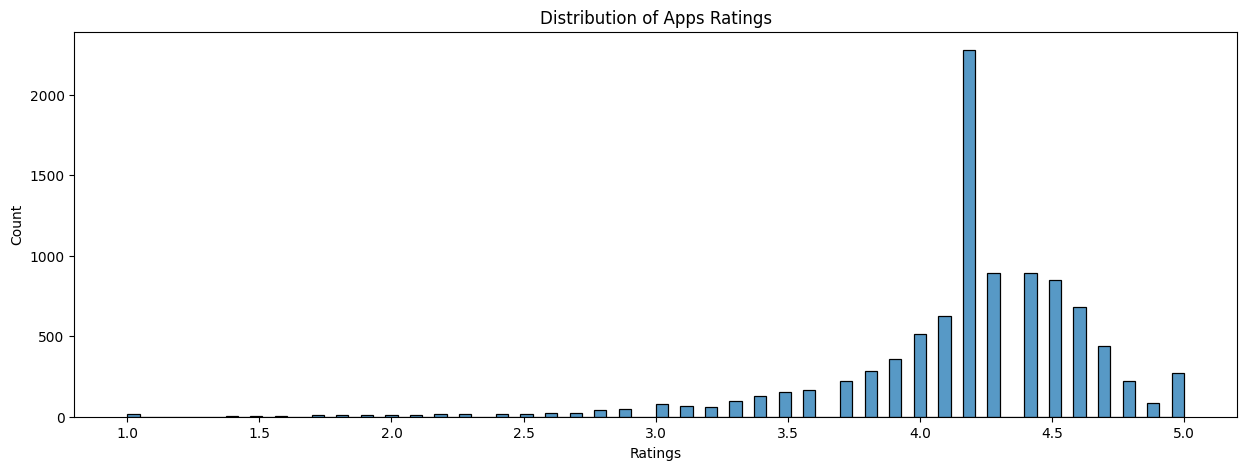

In [76]:
plt.figure(figsize=(15,5))
sns.histplot(df['Rating'])
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Distribution of Apps Ratings')
plt.show()

**Q2. Which categories have the highest number of apps?**
> * There are greater than one category in one value so we need to seperate values first
> * We shouldn't take 'UnKnown' values in visualization

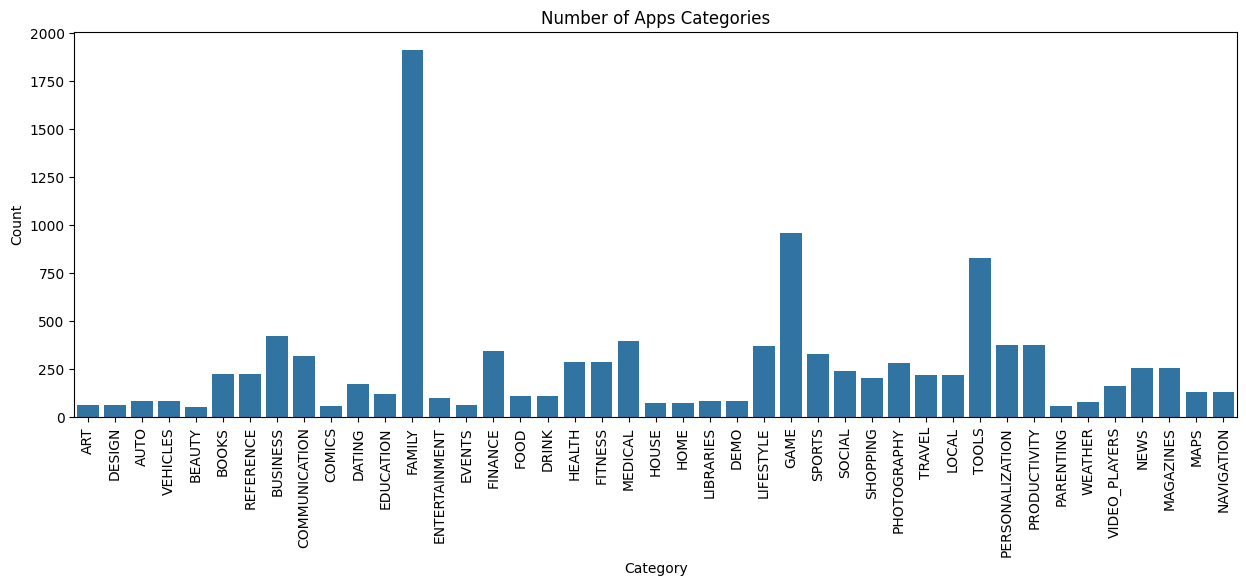

In [77]:
df_exploded = df.assign(Category=df['Category'].str.split('_AND_')).explode('Category', ignore_index=True)
df_exploded=df_exploded[df_exploded['Category']!='UnKnown']
plt.figure(figsize=(15,5))
sns.countplot(x=df_exploded['Category'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Number of Apps Categories')
plt.show()

**Q3. What is the relationship between app size and rating?**
> we shouldn't take Size value that equal 0.0

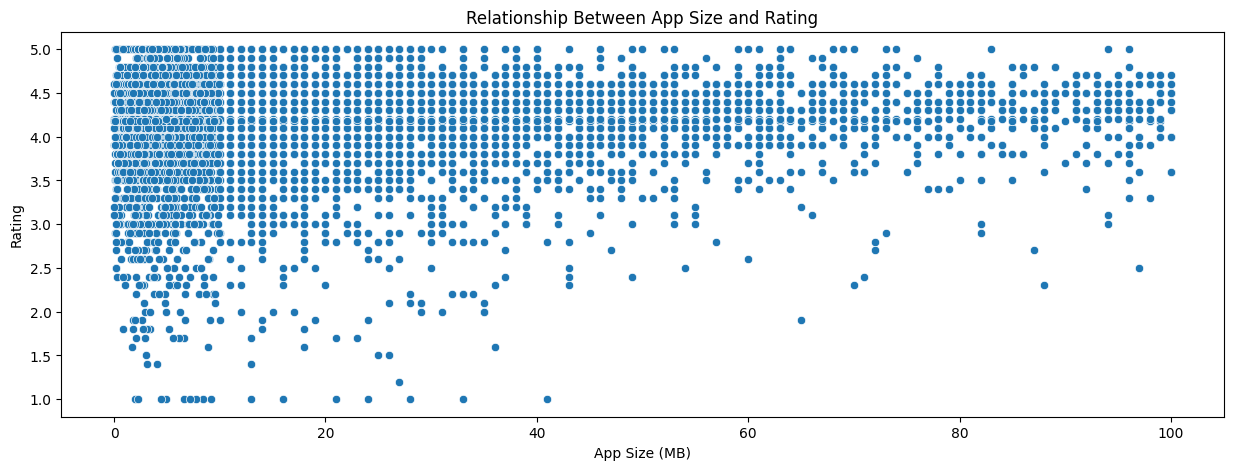

In [78]:
filtered_df=df[df['Size in (MB)']!=0.0]
plt.figure(figsize=(15, 5))
sns.scatterplot(x=filtered_df['Size in (MB)'], y=df['Rating'])
plt.xlabel("App Size (MB)")
plt.ylabel("Rating")
plt.title("Relationship Between App Size and Rating")
plt.show()

**Q4. How many free vs. paid apps are there?**
> The best visualize to it by percentage and pie chart

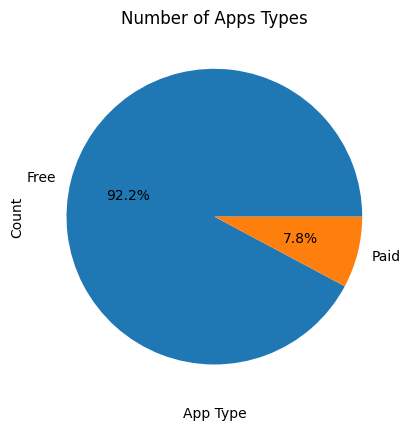

In [79]:
counts=df['Type'].value_counts()
plt.pie(counts,labels=counts.index,autopct='%1.1f%%')
plt.xlabel("App Type")
plt.ylabel("Count")
plt.title("Number of Apps Types")
plt.show()

**Q5. Which categories have the highest average ratings?**
> *  There are greater than one category in one value so we need to seperate values first
> * The 'UnKnown' values shouldn't be contained in the plot
> *  The best way to visualize it by Bar chart

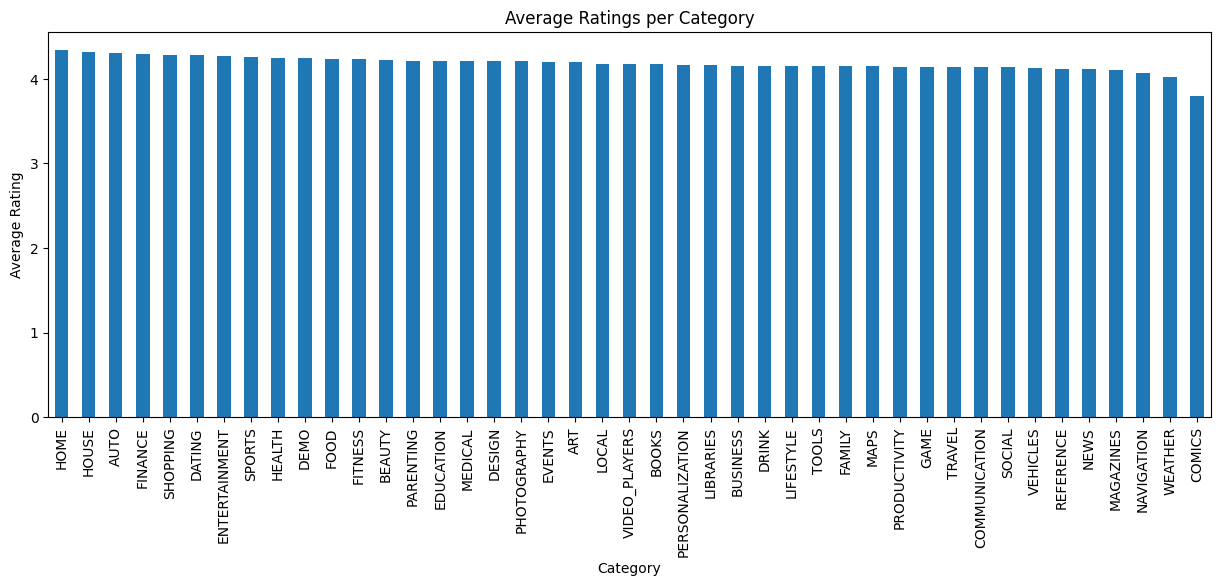

In [80]:
plt.figure(figsize=(15, 5))
df_exploded = df.assign(Category=df['Category'].str.split('_AND_')).explode('Category', ignore_index=True)
df_exploded=df_exploded[df_exploded['Category']!='UnKnown']
df.groupby(df_exploded['Category'])['Rating'].mean().sort_values(ascending=False).plot(kind="bar")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.title("Average Ratings per Category")
plt.xticks(rotation=90)
plt.show()

**Q6. What is the distribution of app installs?**
> I'll visualize it by Box plot

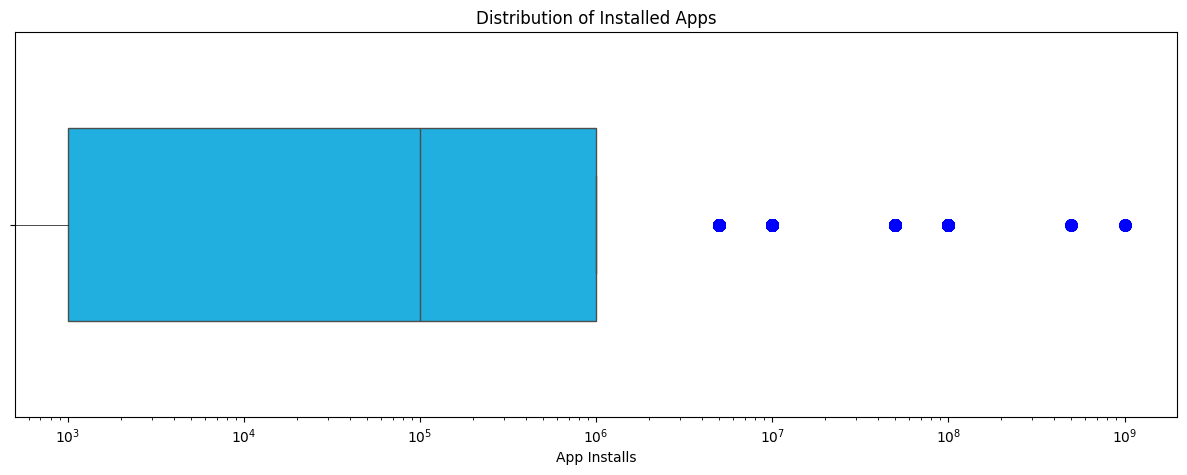

In [81]:
plt.figure(figsize=(15,5))
sns.boxplot(
    x=df['Min Installs'], 
    color="deepskyblue",  
    width=0.5,
    whiskerprops={'color': 'black', 'linewidth': 0.5},
    flierprops={'marker': 'o', 'markerfacecolor': 'blue', 'markeredgecolor': 'blue', 'markersize': 8, 'alpha': 0.5})
plt.xscale("log")
plt.xlabel('App Installs')
plt.title('Distribution of Installed Apps')
plt.show()

**Q7. How does the number of reviews vary by category?**
> * we should first seperate Category values and drop 'UnKnown'
> * I'll visualize it by Bar plot so We should modify 'estimator' 

/tmp/ipykernel_5591/1317751025.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df_exploded['Category'], y='Reviews', data=df,estimator=sum,ci=None)


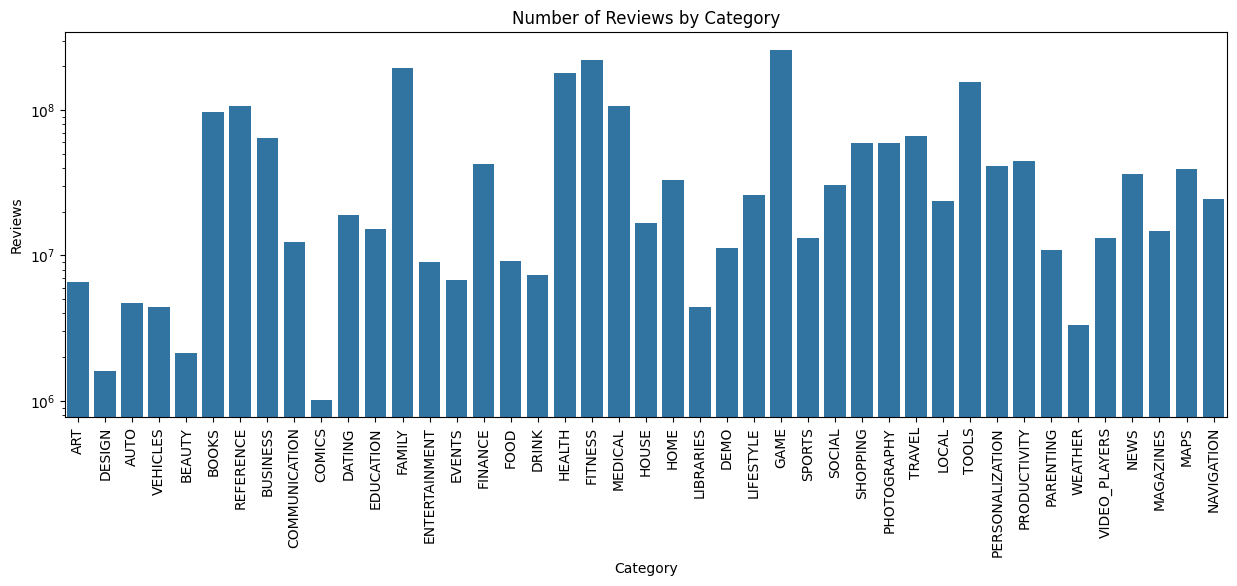

In [82]:
df_exploded = df.assign(Category=df['Category'].str.split('_AND_')).explode('Category', ignore_index=True)
df_exploded=df_exploded[df_exploded['Category']!='UnKnown']
plt.figure(figsize=(15, 5))
sns.barplot(x=df_exploded['Category'], y='Reviews', data=df,estimator=sum,ci=None)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("Number of Reviews by Category")
plt.show()

**Q8. What is the trend of apps Released over time?**
> * I'll first seperate year from 'Released' column
> * the best visualization to years by Line plot
> * combine data by year to get sum of apps count in it

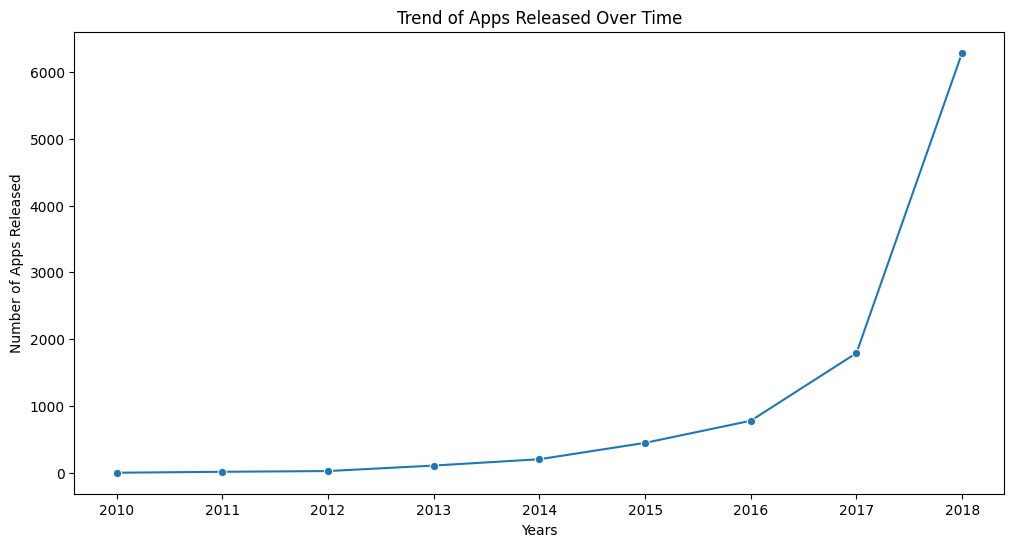

In [83]:
df['Release Year'] = df['Released'].dt.year
apps_per_years = df.groupby('Release Year').size().reset_index(name='App Count')
plt.figure(figsize=(12, 6))
sns.lineplot(x='Release Year', y='App Count', data=apps_per_years, marker='o')
plt.xlabel("Years") 
plt.ylabel("Number of Apps Released")
plt.title("Trend of Apps Released Over Time")
plt.show()

**Q9. Which genres are most popular?**
> * We should first seperate values in Genres and drop 'UnKnown'
> *  Combine data in new data frame and sort it by Installs values descending
> *  Visualize Top 10 values with Bar plot

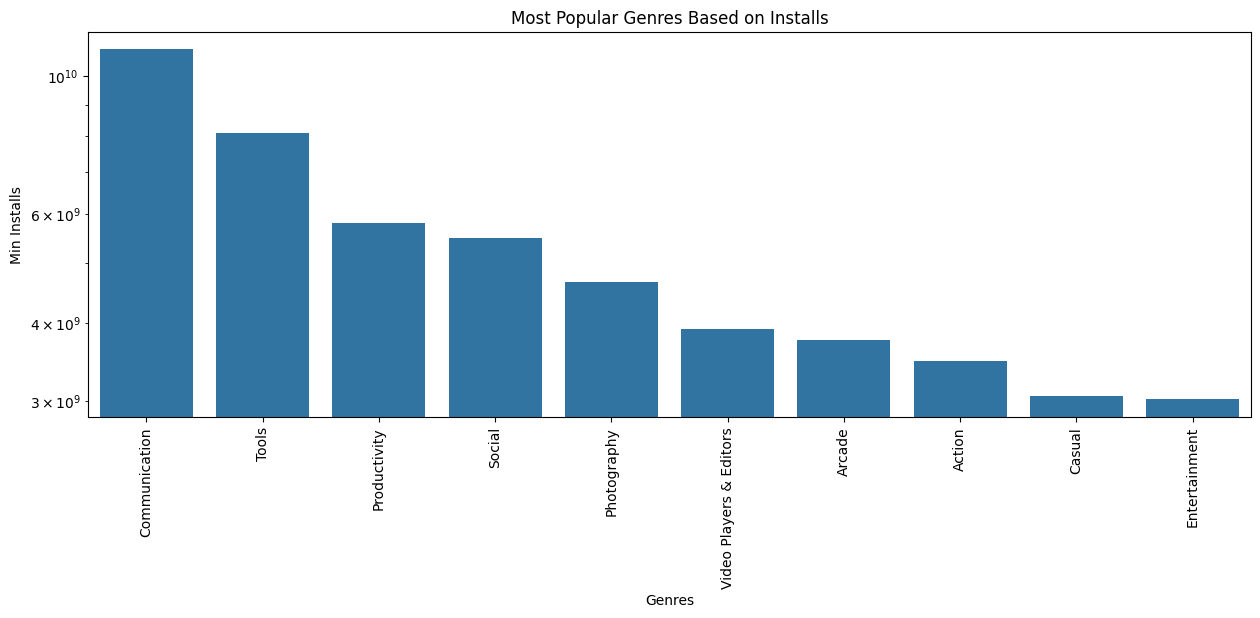

In [84]:
df_exploded = df.assign(Category=df['Genres'].str.split(' & ')).explode('Genres', ignore_index=True)
df_exploded=df_exploded[df_exploded['Genres']!='UnKnown']
genre_popularity = df_exploded.groupby('Genres')['Min Installs'].sum().reset_index()
genre_popularity = genre_popularity.sort_values(by='Min Installs', ascending=False).head(10)
plt.figure(figsize=(15, 5))
sns.barplot(x='Genres', y='Min Installs',data=genre_popularity)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("Most Popular Genres Based on Installs")
plt.show()

**Q10. Is there a correlation between app size and the number of 
installs?**
> * First drop 0.0 values
> * The best Correlation Visualization by Scatter plot in Regression Line
> * To avoid noise in Visualization We can modify scatter with False

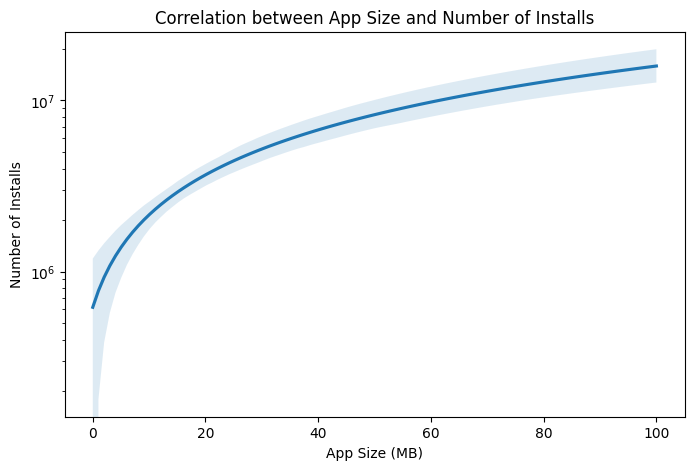

In [85]:
filtered_df = df[(df['Size in (MB)']!=0.0)]
plt.figure(figsize=(8, 5))
sns.regplot(x=filtered_df['Size in (MB)'], y=filtered_df['Min Installs'],scatter=False)
plt.xlabel("App Size (MB)")
plt.ylabel("Number of Installs")
plt.yscale('log')
plt.title("Correlation between App Size and Number of Installs")
plt.show()